<a href="https://colab.research.google.com/github/adamrhurley/AI_Assignment3/blob/main/T00198396_Assignment3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Intro & References


For this project I am investigating how to work with imbalanced data and using different tactics to combat it.

The dataset that I used can be found here:

https://www.kaggle.com/fedesoriano/company-bankruptcy-prediction

This is the link to download it:

https://www.kaggle.com/fedesoriano/company-bankruptcy-prediction/download

This dataset has 95 different attributes relating to the bussinesses and another which says if the business became bankrupt (1) or not (0)

I found some tactics for combatting unbalanced data on these sites:

https://machinelearningmastery.com/tactics-to-combat-imbalanced-classes-in-your-machine-learning-dataset/

https://elitedatascience.com/imbalanced-classes

https://machinelearningmastery.com/model-based-outlier-detection-and-removal-in-python/


# Imports and Dataframe

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import io
from sklearn.svm import LinearSVC
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import cohen_kappa_score
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from matplotlib import pyplot
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import f1_score
from sklearn.metrics import auc

/usr/local/lib/python3.7/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)


In [ ]:
from google.colab import files
uploaded = files.upload()

Saving data.csv to data.csv


In [ ]:
df = pd.read_csv(io.BytesIO(uploaded['data.csv']))

In [ ]:
df.head()

,Bankrupt?,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,Continuous interest rate (after tax),Operating Expense Rate,Research and development expense rate,Cash flow rate,Interest-bearing debt interest rate,Tax rate (A),Net Value Per Share (B),Net Value Per Share (A),Net Value Per Share (C),Persistent EPS in the Last Four Seasons,Cash Flow Per Share,Revenue Per Share (Yuan ¥),Operating Profit Per Share (Yuan ¥),Per Share Net profit before tax (Yuan ¥),Realized Sales Gross Profit Growth Rate,Operating Profit Growth Rate,After-tax Net Profit Growth Rate,Regular Net Profit Growth Rate,Continuous Net Profit Growth Rate,Total Asset Growth Rate,Net Value Growth Rate,Total Asset Return Growth Rate Ratio,Cash Reinvestment %,Current Ratio,Quick Ratio,Interest Expense Ratio,Total debt/Total net worth,Debt ratio %,Net worth/Assets,Long-term fund suitability ratio (A),...,Current Assets/Total Assets,Cash/Total Assets,Quick Assets/Current Liability,Cash/Current Liability,Current Liability to Assets,Operating Funds to Liability,Inventory/Working Capital,Inventory/Current Liability,Current Liabilities/Liability,Working Capital/Equity,Current Liabilities/Equity,Long-term Liability to Current Assets,Retained Earnings to Total Assets,Total income/Total expense,Total expense/Assets,Current Asset Turnover Rate,Quick Asset Turnover Rate,Working capitcal Turnover Rate,Cash Turnover Rate,Cash Flow to Sales,Fixed Assets to Assets,Current Liability to Liability,Current Liability to Equity,Equity to Long-term Liability,Cash Flow to Total Assets,Cash Flow to Liability,CFO to Assets,Cash Flow to Equity,Current Liability to Current Assets,Liability-Assets Flag,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability
0,1,0.370594,0.424389,0.405750,0.601457,0.601457,0.998969,0.796887,0.808809,0.302646,0.780985,1.256969e-04,0.0,0.458143,0.000725,0.0,0.147950,0.147950,0.147950,0.169141,0.311664,0.017560,0.095921,0.138736,0.022102,0.848195,0.688979,0.688979,0.217535,4.980000e+09,0.000327,0.263100,0.363725,0.002259,0.001208,0.629951,0.021266,0.207576,0.792424,0.005024,...,0.190643,0.004094,0.001997,1.473360e-04,0.147308,0.334015,0.276920,0.001036,0.676269,0.721275,0.339077,0.025592,0.903225,0.002022,0.064856,7.010000e+08,6.550000e+09,0.593831,4.580000e+08,0.671568,0.424206,0.676269,0.339077,0.126549,0.637555,0.458609,0.520382,0.312905,0.118250,0,0.716845,0.009219,0.622879,0.601453,0.827890,0.290202,0.026601,0.564050,1,0.016469
1,1,0.464291,0.538214,0.516730,0.610235,0.610235,0.998946,0.797380,0.809301,0.303556,0.781506,2.897851e-04,0.0,0.461867,0.000647,0.0,0.182251,0.182251,0.182251,0.208944,0.318137,0.021144,0.093722,0.169918,0.022080,0.848088,0.689693,0.689702,0.217620,6.110000e+09,0.000443,0.264516,0.376709,0.006016,0.004039,0.635172,0.012502,0.171176,0.828824,0.005059,...,0.182419,0.014948,0.004136,1.383910e-03,0.056963,0.341106,0.289642,0.005210,0.308589,0.731975,0.329740,0.023947,0.931065,0.002226,0.025516,1.065198e-04,7.700000e+09,0.593916,2.490000e+09,0.671570,0.468828,0.308589,0.329740,0.120916,0.641100,0.459001,0.567101,0.314163,0.047775,0,0.795297,0.008323,0.623652,0.610237,0.839969,0.283846,0.264577,0.570175,1,0.020794
2,1,0.426071,0.499019,0.472295,0.601450,0.601364,0.998857,0.796403,0.808388,0.302035,0.780284,2.361297e-04,25500000.0,0.458521,0.000790,0.0,0.177911,0.177911,0.193713,0.180581,0.307102,0.005944,0.092338,0.142803,0.022760,0.848094,0.689463,0.689470,0.217601,7.280000e+09,0.000396,0.264184,0.368913,0.011543,0.005348,0.629631,0.021248,0.207516,0.792484,0.005100,..

# Data Analysis

In [ ]:
df.describe()

,Bankrupt?,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,Continuous interest rate (after tax),Operating Expense Rate,Research and development expense rate,Cash flow rate,Interest-bearing debt interest rate,Tax rate (A),Net Value Per Share (B),Net Value Per Share (A),Net Value Per Share (C),Persistent EPS in the Last Four Seasons,Cash Flow Per Share,Revenue Per Share (Yuan ¥),Operating Profit Per Share (Yuan ¥),Per Share Net profit before tax (Yuan ¥),Realized Sales Gross Profit Growth Rate,Operating Profit Growth Rate,After-tax Net Profit Growth Rate,Regular Net Profit Growth Rate,Continuous Net Profit Growth Rate,Total Asset Growth Rate,Net Value Growth Rate,Total Asset Return Growth Rate Ratio,Cash Reinvestment %,Current Ratio,Quick Ratio,Interest Expense Ratio,Total debt/Total net worth,Debt ratio %,Net worth/Assets,Long-term fund suitability ratio (A),...,Current Assets/Total Assets,Cash/Total Assets,Quick Assets/Current Liability,Cash/Current Liability,Current Liability to Assets,Operating Funds to Liability,Inventory/Working Capital,Inventory/Current Liability,Current Liabilities/Liability,Working Capital/Equity,Current Liabilities/Equity,Long-term Liability to Current Assets,Retained Earnings to Total Assets,Total income/Total expense,Total expense/Assets,Current Asset Turnover Rate,Quick Asset Turnover Rate,Working capitcal Turnover Rate,Cash Turnover Rate,Cash Flow to Sales,Fixed Assets to Assets,Current Liability to Liability,Current Liability to Equity,Equity to Long-term Liability,Cash Flow to Total Assets,Cash Flow to Liability,CFO to Assets,Cash Flow to Equity,Current Liability to Current Assets,Liability-Assets Flag,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability
count,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6.819000e+03,6.819000e+03,6819.000000,6.819000e+03,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6.819000e+03,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6.819000e+03,6.819000e+03,6819.000000,6819.000000,6.819000e+03,6.819000e+03,6819.000000,6.819000e+03,6819.000000,6819.000000,6819.000000,...,6819.000000,6819.000000,6.819000e+03,6.819000e+03,6819.000000,6819.000000,6819.000000,6.819000e+03,6819.000000,6819.000000,6819.000000,6.819000e+03,6819.000000,6819.000000,6819.000000,6.819000e+03,6.819000e+03,6819.000000,6.819000e+03,6819.000000,6.819000e+03,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6.819000e+03,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.0,6819.000000
mean,0.032263,0.505180,0.558625,0.553589,0.607948,0.607929,0.998755,0.797190,0.809084,0.303623,0.781381,1.995347e+09,1.950427e+09,0.467431,1.644801e+07,0.115001,0.190661,0.190633,0.190672,0.228813,0.323482,1.328641e+06,0.109091,0.184361,0.022408,0.847980,0.689146,0.689150,0.217639,5.508097e+09,1.566212e+06,0.264248,0.379677,4.032850e+05,8.376595e+06,0.630991,4.416337e+06,0.113177,0.886823,0.008783,...,0.522273,0.124095,3.592902e+06,3.715999e+07,0.090673,0.353828,0.277395,5.580680e+07,0.761599,0.735817,0.331410,5.416004e+07,0.934733,0.002549,0.029184,1.195856e+09,2.163735e+09,0.594006,2.471977e+09,0.671531,1.220121e+06,0.761599,0.331410,0.115645,0.649731,0.461849,0.593415,0.315582,0.031506,0.001173,0.807760,1.862942e+07,0.623915,0.607946,0.840402,0.280365,0.027541,0.565358,1.0,0.047578
std,0.176710,0.060686

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6819 entries, 0 to 6818
Data columns (total 96 columns):
 #   Column                                                    Non-Null Count  Dtype  
---  ------                                                    --------------  -----  
 0   Bankrupt?                                                 6819 non-null   int64  
 1    ROA(C) before interest and depreciation before interest  6819 non-null   float64
 2    ROA(A) before interest and % after tax                   6819 non-null   float64
 3    ROA(B) before interest and depreciation after tax        6819 non-null   float64
 4    Operating Gross Margin                                   6819 non-null   float64
 5    Realized Sales Gross Margin                              6819 non-null   float64
 6    Operating Profit Rate                                    6819 non-null   float64
 7    Pre-tax net Interest Rate                                6819 non-null   float64
 8    After-tax net Int

In [ ]:
df.shape

(6819, 96)

In [ ]:
bankrupt = df['Bankrupt?'].value_counts()

In [ ]:
total = 6599 + 220
bankrupt = (220/total)*100
notBankrupt = 6599/total*100
print("Bankrupt: " + str(bankrupt) + "%")
print("Not Bankrupt: " + str(notBankrupt) + "%")

Bankrupt: 3.2262795131250916%
Not Bankrupt: 96.77372048687491%


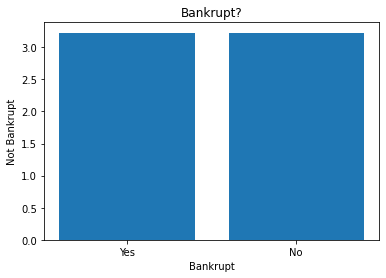

In [ ]:
var = ['Yes','No']
plt.bar(var,bankrupt)
plt.title('Bankrupt?')
plt.xlabel('Bankrupt')
plt.ylabel('Not Bankrupt')
plt.show()

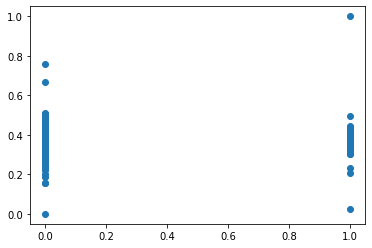

In [ ]:
plt.scatter(df['Bankrupt?'],df[' Cash Reinvestment %'], marker='o');

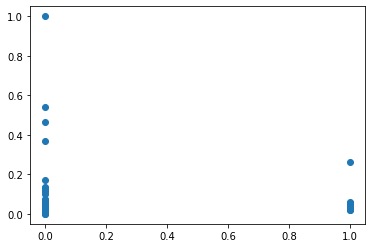

In [ ]:
plt.scatter(df['Bankrupt?'],df[' Degree of Financial Leverage (DFL)'], marker='o');

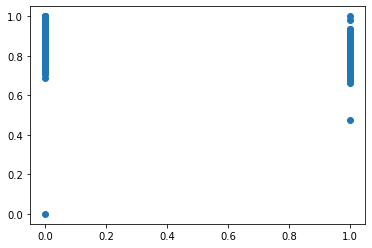

In [ ]:
plt.scatter(df['Bankrupt?'],df[' Net worth/Assets'], marker='o');

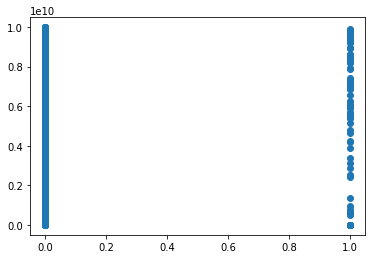

In [ ]:
plt.scatter(df['Bankrupt?'],df[' Operating Expense Rate'], marker='o');

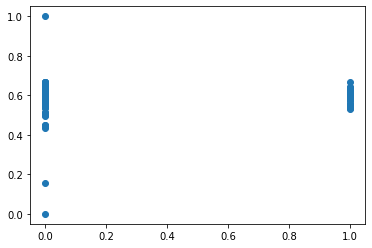

In [ ]:
plt.scatter(df['Bankrupt?'],df[' Operating Gross Margin'], marker='o');

In [ ]:
maxGrossMargin = df[' Operating Gross Margin'].max()
print("Highest Operating Gross Margin:" + str(maxGrossMargin))

minGrossMargin = df[' Operating Gross Margin'].min()
print("Lowest Operating Gross Margin:" + str(minGrossMargin))

avgGrossMargin = df[' Operating Gross Margin'].mean()
print("Average Operating Gross Margin:" + str(avgGrossMargin))

Highest Operating Gross Margin:1.0
Lowest Operating Gross Margin:0.0
Average Operating Gross Margin:0.6079480383703836


In [ ]:
maxExpenseRate = df[' Operating Expense Rate'].max()
print("Highest Operating Expense Rate:" + str(maxExpenseRate))

minExpenseRate = df[' Operating Expense Rate'].min()
print("Lowest Operating Expense Rate:" + str(minExpenseRate))

avgExpenseRate = df[' Operating Expense Rate'].mean()
print("Average Operating Expense Rate:" + str(avgExpenseRate))

Highest Operating Expense Rate:9990000000.0
Lowest Operating Expense Rate:0.0
Average Operating Expense Rate:1995347312.8027918


# No Adjustments

For this I made no changes to the data and put it straight into a linear SVC model.

***RESULTS:***

As expected the accuracy that the model returned was ~98%, this is due to the data being unbalanced.

The F1 score also came back with ~98% accuracy.

The cohen kappa score came back almost 0 showing that there is little to no agreement between raters.

The fact that the accuracy of the models and the cohen kappa score are on either ends of the scale shows that there are problems with the balance of our data. This will be explored futher as we go on.

In [ ]:
df = pd.read_csv(io.BytesIO(uploaded['data.csv']))

X = df.drop('Bankrupt?', axis=1)
Y = df['Bankrupt?']

xTrain, xTest, yTrain, yTest = train_test_split(X,Y, random_state=42, shuffle=False)

In [ ]:
print(xTrain.shape,xTest.shape,yTrain.shape,yTest.shape)

(5114, 95) (1705, 95) (5114,) (1705,)


In [ ]:
lsvc = LinearSVC(class_weight=None, dual=True, fit_intercept=True, loss='hinge', max_iter=1000, multi_class='ovr', random_state=True)

In [ ]:
lsvc.fit(xTrain, yTrain)
score = lsvc.score(xTest, yTest)
print("Score: ", score)

Score:  0.9818181818181818


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


Confusion Matrix:
[[1673    6]
 [  25    1]]


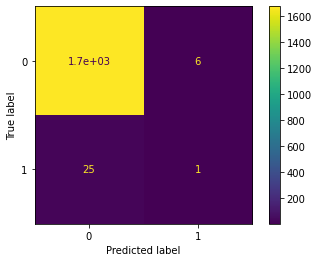


 Classification Report:
              precision    recall  f1-score   support

           0       0.99      1.00      0.99      1679
           1       0.14      0.04      0.06        26

    accuracy                           0.98      1705
   macro avg       0.56      0.52      0.53      1705
weighted avg       0.97      0.98      0.98      1705


Cohen Kappa Score:
0.05448918623996002


In [ ]:
yPred = lsvc.predict(xTest)

cm = confusion_matrix(yTest, yPred)
print("Confusion Matrix:")
print(cm)

plot_confusion_matrix(lsvc,xTest, yTest)
plt.show()

cr = classification_report(yTest, yPred)
print("\n Classification Report:")
print(cr)

ck = cohen_kappa_score(yTest, yPred)
print("\nCohen Kappa Score:")
print(ck)

# Oversampling Using SMOTE


SMOTE stands for Synthetic Minority Over-sampling Technique.
It is a method which is used to generate Synthetic samples instead of making copies.The hope is that by using this to add more samples it will balance out the data.

***RESULTS:***

After adding more samples to the data, the accuracy reduced to ~57%. This is a more realistic figure for the dataset and shows that the SMOTE method had a positive affect on balancing the data.

In [ ]:
df = pd.read_csv(io.BytesIO(uploaded['data.csv']))

X = df.drop('Bankrupt?', axis=1)
Y = df['Bankrupt?']

oversample = SMOTE()
X, Y = oversample.fit_resample(X, Y)

xTrain, xTest, yTrain, yTest = train_test_split(X,Y, random_state=42, shuffle=False)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [ ]:
print(xTrain.shape,xTest.shape,yTrain.shape,yTest.shape)

(9898, 95) (3300, 95) (9898,) (3300,)


In [ ]:
lsvc = LinearSVC(class_weight=None, dual=True, fit_intercept=True, loss='hinge', max_iter=1000, multi_class='ovr', random_state=True)

In [ ]:
lsvc.fit(xTrain, yTrain)
score = lsvc.score(xTest, yTest)
print("Score: ", score)

Score:  0.5793939393939394


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


Confusion Matrix:
[[   0    0]
 [1856 1444]]


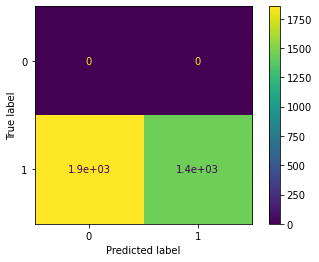

In [ ]:
yPred = lsvc.predict(xTest)

cm = confusion_matrix(yTest, yPred)
print("Confusion Matrix:")
print(cm)

plot_confusion_matrix(lsvc,xTest, yTest)
plt.show()

# Oversampling DecisionTreeClassifier

For this tactic I used random over-sampling which randomly selects samples and makes copies of them. Again the hope is that this will balance out the data.

This time I used the Decision Tree Classifier model.

***RESULTS:***

After using random over-sampling the accuracy was ~95%.
This is slightly lower than when there were no adjustments made but it is still unrealisticly high. This might suggest that the random samples that were copied were mostly those where a business did not become bankrupt so there was little to no change on the balance of the data.

In [ ]:
from numpy import mean
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.tree import DecisionTreeClassifier
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import RandomOverSampler

In [ ]:
df = pd.read_csv(io.BytesIO(uploaded['data.csv']))

X = df.drop('Bankrupt?', axis=1)
Y = df['Bankrupt?']

In [ ]:
steps = [('over', RandomOverSampler()), ('model', DecisionTreeClassifier())]
pipeline = Pipeline(steps=steps)
# evaluate pipeline
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
scores = cross_val_score(pipeline, X, Y, scoring='f1_micro', cv=cv, n_jobs=-1)
score = mean(scores)
print('F1 Score: %.3f' % score)

F1 Score: 0.956


# Undersampling DecisionTreeClassifier

For this tactic I used random under-sampling which randomly selects samples to remove from the dataset. Again the hope is that this will balance out the data.

The Decision Tree Classifier model was used again.

***RESULTS:***

After using random under-sampling the accuracy was ~80%. This is a much more realistic accuracy when compared to the previous random over-sampling. This shows that more samples where a business did not become bankrupt were removed which means the data was more balanced.

In [ ]:
from collections import Counter
from imblearn.under_sampling import RandomUnderSampler

In [ ]:
df = pd.read_csv(io.BytesIO(uploaded['data.csv']))

X = df.drop('Bankrupt?', axis=1)
Y = df['Bankrupt?']

In [ ]:
steps = [('under', RandomUnderSampler()), ('model', DecisionTreeClassifier())]
pipeline = Pipeline(steps=steps)

cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
scores = cross_val_score(pipeline, X, Y, scoring='f1_micro', cv=cv, n_jobs=-1)
score = mean(scores)
print('F1 Score: %.3f' % score)

F1 Score: 0.805


# Penalized Classification

Penalize algorithims work by increasing the cost of classification mistakes on the minority class and decrease the majority class. This should in theroy provide a more accurat accuracy score.

***RESULTS:***

Before adding the penalize algorithim we got an accuracy of ~98% which is an unrealistic accuracy score. After applying the penalize algorithim the accuracy score was reduced to ~87% which is more realistic and shows that the data is more balanced. 

In [ ]:
df = pd.read_csv(io.BytesIO(uploaded['data.csv']))

X = df.drop('Bankrupt?', axis=1)
Y = df['Bankrupt?']

xTrain, xTest, yTrain, yTest = train_test_split(X,Y, random_state=42, shuffle=False)

In [ ]:
lsvc = LinearSVC(C=1.0, dual=False, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=10000,
          multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
          verbose=0)

lsvc.fit(xTrain, yTrain)
score = lsvc.score(xTest, yTest)
print("Score: ", score)

Score:  0.9829912023460411


In [ ]:
lsvc = LinearSVC(C=1.0, class_weight='balanced', dual=False, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=10000,
          multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
          verbose=0)

lsvc.fit(xTrain, yTrain)
score = lsvc.score(xTest, yTest)
print("Score: ", score)

Score:  0.8727272727272727


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


Confusion Matrix:
[[1478  201]
 [  16   10]]


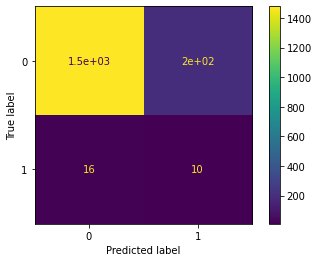

In [ ]:
yPred = lsvc.predict(xTest)

cm = confusion_matrix(yTest, yPred)
print("Confusion Matrix:")
print(cm)

plot_confusion_matrix(lsvc,xTest, yTest)
plt.show()

# Outlier Detection

For this tactic I will use 4 automatic outlier detection algorithims:

*   Isolation Forest
*   Minimum Covariance Determinant
*   Local Outlier Factor
*   One Class SVM

The aim of these algorithims is that any outliers within the dataset will be removed, creating a more ccurate dataset. If the dataset has many outliers they could skew the final accuracy score.

***RESULTS:***

The accuracy achived without applying any outlier detection algorithim returned and acuracy of ~98%. This will be used as a baseline comparison with the the other slgorithims.

3 out of the 4 algorithims returned accuracy scores of between 93% and 96%. These scores are too high, unrealistic and very close to the baseline accuracy showing that these algorithims did not have much effect on balancing the data. This could show that these algorithims were unable to find many outliers in the data.

The Minimum Covariance Determinant algorithim returned an accuracy score of 80%. This shows that this algorithm was able to find more outliers in the data which in turn balanced the data.










### No adjustment

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error

In [ ]:
df = pd.read_csv(io.BytesIO(uploaded['data.csv']))

X = df.drop('Bankrupt?', axis=1)
Y = df['Bankrupt?']

xTrain, xTest, yTrain, yTest = train_test_split(X,Y, random_state=42, shuffle=False)

In [ ]:
lsvc = LinearSVC(class_weight=None, dual=True, fit_intercept=True, loss='hinge', max_iter=1000, multi_class='ovr', random_state=True)

lsvc.fit(xTrain, yTrain)

prediction = lsvc.predict(xTest)

score = lsvc.score(xTest, yTest)
print("\nScore:", score)


Score: 0.9818181818181818


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


Confusion Matrix:
[[1673    6]
 [  25    1]]


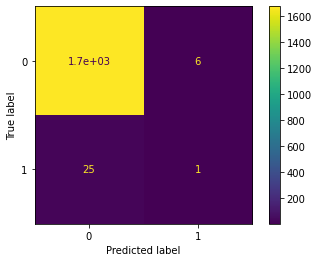

In [ ]:
cm = confusion_matrix(yTest, prediction)
print("Confusion Matrix:")
print(cm)

plot_confusion_matrix(lsvc,xTest, yTest)
plt.show()

### Isolation Forest

In [ ]:
from sklearn.ensemble import IsolationForest

In [ ]:
df = pd.read_csv(io.BytesIO(uploaded['data.csv']))

X = df.drop('Bankrupt?', axis=1)
Y = df['Bankrupt?']

xTrain, xTest, yTrain, yTest = train_test_split(X,Y,test_size=0.33, random_state=1)

In [ ]:
iso = IsolationForest(contamination=0.1)

In [ ]:
prediction = iso.fit_predict(xTrain)

mask = prediction != -1

xTrain, yTrain = xTrain.iloc[mask, :], yTrain.iloc[mask]

lsvc = LinearSVC(class_weight=None, dual=True, fit_intercept=True, loss='hinge', max_iter=1000, multi_class='ovr', random_state=True)
lsvc.fit(xTrain, yTrain)

score = lsvc.score(xTest, yTest)
print("\nScore:", score)


Score: 0.9546868058640604


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


Confusion Matrix:
[[2147   31]
 [  71    2]]


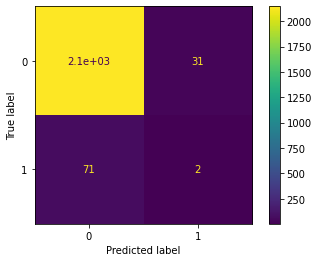

In [ ]:
yPred = lsvc.predict(xTest)

cm = confusion_matrix(yTest, yPred)
print("Confusion Matrix:")
print(cm)

plot_confusion_matrix(lsvc,xTest, yTest)
plt.show()

### Minimum Covariance Determinant

In [ ]:
from sklearn.covariance import EllipticEnvelope

In [ ]:
df = pd.read_csv(io.BytesIO(uploaded['data.csv']))

X = df.drop('Bankrupt?', axis=1)
Y = df['Bankrupt?']

xTrain, xTest, yTrain, yTest = train_test_split(X,Y,test_size=0.33, random_state=1)

In [ ]:
ee = EllipticEnvelope(contamination=0.01)

In [ ]:
prediction = ee.fit_predict(xTrain)

mask = prediction != -1

xTrain, yTrain = xTrain.iloc[mask, :], yTrain.iloc[mask]

lsvc = LinearSVC(class_weight=None, dual=True, fit_intercept=True, loss='hinge', max_iter=1000, multi_class='ovr', random_state=True)
lsvc.fit(xTrain, yTrain)

score = lsvc.score(xTest, yTest)
print("\nScore:", score)

/usr/local/lib/python3.7/dist-packages/sklearn/covariance/_robust_covariance.py:644: UserWarning: The covariance matrix associated to your dataset is not full rank
  warnings.warn("The covariance matrix associated to your dataset "



Score: 0.8031985784095957


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


Confusion Matrix:
[[1788  390]
 [  53   20]]


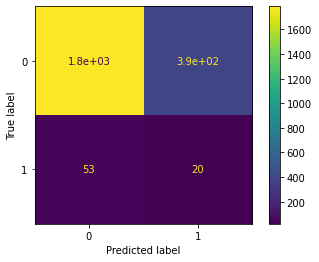

In [ ]:
yPred = lsvc.predict(xTest)

cm = confusion_matrix(yTest, yPred)
print("Confusion Matrix:")
print(cm)

plot_confusion_matrix(lsvc,xTest, yTest)
plt.show()

### Local Outlier Factor

In [ ]:
from sklearn.neighbors import LocalOutlierFactor

In [ ]:
df = pd.read_csv(io.BytesIO(uploaded['data.csv']))

X = df.drop('Bankrupt?', axis=1)
Y = df['Bankrupt?']

xTrain, xTest, yTrain, yTest = train_test_split(X,Y,test_size=0.33, random_state=1)

In [ ]:
lof = LocalOutlierFactor()

In [ ]:
prediction = lof.fit_predict(xTrain)

mask = prediction != -1

xTrain, yTrain = xTrain.iloc[mask, :], yTrain.iloc[mask]

lsvc = LinearSVC(class_weight=None, dual=True, fit_intercept=True, loss='hinge', max_iter=1000, multi_class='ovr', random_state=True)
lsvc.fit(xTrain, yTrain)

prediction = lsvc.predict(xTest)

score = lsvc.score(xTest, yTest)
print("\nScore:", score)


Score: 0.9644602398933807


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


Confusion Matrix:
[[2168   10]
 [  70    3]]


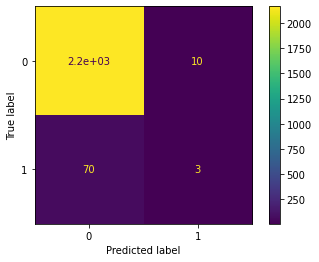

In [ ]:
yPred = lsvc.predict(xTest)

cm = confusion_matrix(yTest, yPred)
print("Confusion Matrix:")
print(cm)

plot_confusion_matrix(lsvc,xTest, yTest)
plt.show()

### One Class SVM

In [ ]:
from sklearn.svm import OneClassSVM

In [ ]:
df = pd.read_csv(io.BytesIO(uploaded['data.csv']))

X = df.drop('Bankrupt?', axis=1)
Y = df['Bankrupt?']

xTrain, xTest, yTrain, yTest = train_test_split(X,Y,test_size=0.33, random_state=1)

In [ ]:
ee = OneClassSVM(nu=0.01)

In [ ]:
prediction = ee.fit_predict(xTrain)

mask = prediction != -1

xTrain, yTrain = xTrain.iloc[mask, :], yTrain.iloc[mask]

lsvc = LinearSVC(class_weight=None, dual=True, fit_intercept=True, loss='hinge', max_iter=1000, multi_class='ovr', random_state=True)
lsvc.fit(xTrain, yTrain)

prediction = lsvc.predict(xTest)

score = lsvc.score(xTest, yTest)
print("\nScore:", score)


Score: 0.9378054198134163


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


Confusion Matrix:
[[2103   75]
 [  65    8]]


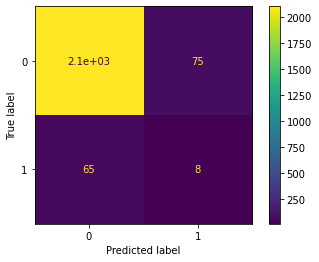

In [ ]:
yPred = lsvc.predict(xTest)

cm = confusion_matrix(yTest, yPred)
print("Confusion Matrix:")
print(cm)

plot_confusion_matrix(lsvc,xTest, yTest)
plt.show()

# Conclusions

To summarise, The change in accuracy metrics such as F1 score did not show much difference and were not overly helpful, although, the Cohen Kappa score did prove that the accuracy results were not entirely truthful. Neither Outlier Detection (except Minimum Covariance Determinant) nor Random Oversampling provided any improvement for balancing the data, the accuracy scores they returned were too similar to when there was no adjustments made showing that they did not improve the balance of the data enough. Random Undersampling provided a more realistic accuracy score for the data and improved the balance of the data but was not the most effictive tactic. Both Oversampling using SMOTE and Outlier Detection using the Minimum Covariance Determinant algorithm showed the best abilty to balance the data and most realistic accuracy results with scores of ~57% and ~80% respectively. Theses two tactics were the clear winners for dealing with imbalanced data. I ran a model below which incorparated both of these tactics. 

In [ ]:
df = pd.read_csv(io.BytesIO(uploaded['data.csv']))

X = df.drop('Bankrupt?', axis=1)
Y = df['Bankrupt?']

oversample = SMOTE()
X, Y = oversample.fit_resample(X, Y)

xTrain, xTest, yTrain, yTest = train_test_split(X,Y, random_state=42, shuffle=False)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [ ]:
ee = EllipticEnvelope(contamination=0.01)

prediction = ee.fit_predict(xTrain)

mask = prediction != -1

xTrain, yTrain = xTrain[mask, :], yTrain[mask]

lsvc = LinearSVC(class_weight=None, dual=True, fit_intercept=True, loss='hinge', max_iter=1000, multi_class='ovr', random_state=True)
lsvc.fit(xTrain, yTrain)

prediction = lsvc.predict(xTest)

score = lsvc.score(xTest, yTest)
print("\nScore:", score)

/usr/local/lib/python3.7/dist-packages/sklearn/covariance/_robust_covariance.py:644: UserWarning: The covariance matrix associated to your dataset is not full rank
  warnings.warn("The covariance matrix associated to your dataset "



Score: 0.49818181818181817


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
